Student ID 25000148967

GitHub Repository Link https://github.com/robwhite-lis/Everything_Counts_Assessment_1

This is a Notebook about 2 of the UKs favourite topics, trains being late and the weather!

The dataset in question is available is the grandiosely named 

"Table 3138 - Train punctuality at recorded station stops by operator (periodic)"

and is available at https://dataportal.orr.gov.uk/statistics/performance/passenger-rail-performance/table-3138-train-punctuality-at-recorded-station-stops-by-operator-periodic/



In [430]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/robwhite-lis/Everything_Counts_Assessment_1/refs/heads/main/Train_punctuality.csv'
url_content = requests.get(df_url, verify = False).content
df_trains = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [431]:
df_trains.describe()

,Number of recorded station stops,MAT Number of recorded station stops
count,3.940000e+03,3.940000e+03
mean,6.474878e+05,8.026629e+06
std,1.394560e+06,1.753747e+07
min,0.000000e+00,6.600000e+01
25%,5.639950e+04,6.938212e+05
50%,2.288885e+05,2.574194e+06
75%,5.195705e+05,6.623621e+06
max,7.012797e+06,8.441222e+07


Train arrivals are monitored in a fairly strange way across periods, which roughly equate to months, but not quite, as there are 13 of them in a year. (They are actually 28 days each). Also the year runs from April to March!

In [432]:
df_trains.head()

,Time Period,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,...,On time within 59 seconds MAA,Time to 3 MAA,Time to 5 MAA,Time to 10 MAA,Time to 15 MAA,Time to 20 MAA,Time to 30 MAA,15 minutes plus MAA,20 minutes plus MAA,30 minutes plus MAA
0,Apr 2014 to Mar 2015 (Period 01),Great Britain,4736697,35.64,68.70,88.43,94.38,98.23,99.17,99.55,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
1,Apr 2014 to Mar 2015 (Period 02),Great Britain,5061146,35.05,67.70,87.50,93.69,97.91,98.98,99.42,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
2,Apr 2014 to Mar 2015 (Period 03),Great Britain,5084203,35.00,67.67,87.43,93.65,97.89,98.99,99.45,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
3,Apr 2014 to Mar 2015 (Period 04),Great Britain,5123892,34.09,66.16,86.44,93.08,97.67,98.87,99.37,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
4,Apr 2014 to Mar 2015 (Period 05),Great Britain,5131680,32.78,63.95,84.38,91.54,97.03,98.56,99.20,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]


In [433]:
df_trains.dtypes

Time Period                             object
Operator                                object
Number of recorded station stops         int64
Early                                   object
On Time within 59 seconds               object
Time to 3                               object
Time to 5                               object
Time to 10                              object
Time to 15                              object
Time to 20                              object
Time to 30                              object
15 minutes plus                         object
20 minutes plus                         object
30 minutes plus                         object
MAT Number of recorded station stops     int64
Early MAA                               object
On time within 59 seconds MAA           object
Time to 3 MAA                           object
Time to 5 MAA                           object
Time to 10 MAA                          object
Time to 15 MAA                          object
Time to 20 MA

OK so let's clean up the date period into something more useable

In [434]:
# Here we are using a regular expression which can be "looked up" online
df_trains[["Start_Year", "Period"]] = df_trains["Time Period"].str.extract(r'(\d{4}).*Period (\d{2})')

In [435]:
df_trains["Start_Year"] = df_trains["Start_Year"].astype(int)
df_trains["Period"] = df_trains["Period"].astype(int)

In [436]:
df_trains[["Time Period", "Start_Year", "Period"]]

,Time Period,Start_Year,Period
0,Apr 2014 to Mar 2015 (Period 01),2014,1
1,Apr 2014 to Mar 2015 (Period 02),2014,2
2,Apr 2014 to Mar 2015 (Period 03),2014,3
3,Apr 2014 to Mar 2015 (Period 04),2014,4
4,Apr 2014 to Mar 2015 (Period 05),2014,5
...,...,...,...
3935,Apr 2025 to Mar 2026 (Period 03),2025,3
3936,Apr 2025 to Mar 2026 (Period 04),2025,4
3937,Apr 2025 to Mar 2026 (Period 05),2025,5
3938,Apr 2025 to Mar 2026 (Period 06),2025,6


Now let's add a Season column

Bearing in mind that the periods run April to March, and there are 13 of them, I've made the following assingments which roughly translate as

Period 1 - 3 spring (April, May, June)

Period 4 - 6 Summe (July, August, September
r
Period 7 - 9 Aumntu (October, November, Decembe
mn
Period 10 - 13  terWin (January, February, March and a bit of Aprter


In [437]:
bins = [0,3,6,9,13]
labels = ["Spring", "Summer", "Autumn", "Winter"]
df_trains["Season"] = pd.cut(df_trains["Period"], bins=bins, labels=labels)

Train arrivals are monitored in a fairly strange way across periods, which roughly equate to months, but not quite, as there are 13 of them in a year. (They are actually 28 days each). Also the year runs from April to March!

OK so let's clean up the date period into something more useable

Now clean the data into just the fields we need for this analysis.

We'll look at that "On Time", +3 mins, +5 mins and + 10 mins

First let's check the column names

In [438]:
df_trains.columns

Index(['Time Period', 'Operator', 'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30', '15 minutes plus',
       '20 minutes plus', '30 minutes plus',
       'MAT Number of recorded station stops', 'Early MAA',
       'On time within 59 seconds MAA', 'Time to 3 MAA', 'Time to 5 MAA',
       'Time to 10 MAA', 'Time to 15 MAA', 'Time to 20 MAA', 'Time to 30 MAA',
       '15 minutes plus MAA', '20 minutes plus MAA', '30 minutes plus MAA',
       'Start_Year', 'Period', 'Season'],
      dtype='object')

In [439]:
df_trains_clean = df_trains[['Start_Year', 'Period', 'Season', 'Operator', 'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30' ]].copy()

Now let's sort out the data types - this is boilerplate code to iterate over and convert a number of fields. The errors="coerce" replaces failures with NaN

In [440]:
numeric_cols = [
    'Start_Year', 'Period', 'Number of recorded station stops', 'Early',
    'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
    'Time to 15', 'Time to 20', 'Time to 30'
]

df_trains_clean[numeric_cols] = df_trains_clean[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)

In [441]:
df_trains_clean.columns

Index(['Start_Year', 'Period', 'Season', 'Operator',
       'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30'],
      dtype='object')

In [442]:
df_trains_clean.dtypes

Start_Year                             int64
Period                                 int64
Season                              category
Operator                              object
Number of recorded station stops       int64
Early                                float64
On Time within 59 seconds            float64
Time to 3                            float64
Time to 5                            float64
Time to 10                           float64
Time to 15                           float64
Time to 20                           float64
Time to 30                           float64
dtype: object

In [443]:
df_trains_clean

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30
0,2014,1,Spring,Great Britain,4736697,35.64,68.70,88.43,94.38,98.23,99.17,99.55,99.83
1,2014,2,Spring,Great Britain,5061146,35.05,67.70,87.50,93.69,97.91,98.98,99.42,99.77
2,2014,3,Spring,Great Britain,5084203,35.00,67.67,87.43,93.65,97.89,98.99,99.45,99.79
3,2014,4,Summer,Great Britain,5123892,34.09,66.16,86.44,93.08,97.67,98.87,99.37,99.76
4,2014,5,Summer,Great Britain,5131680,32.78,63.95,84.38,91.54,97.03,98.56,99.20,99.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,2025,3,Spring,West Midlands Trains,350795,38.17,67.43,84.06,90.84,96.71,98.34,99.08,99.68
3936,2025,4,Summer,West Midlands Trains,347956,35.55,63.41,80.43,87.68,95.04,97.36,98.43,99.33
3937,2025,5,Summer,West Midlands Trains,345491,38.25,67.13,83.73,90.43,96.18,97.92,98.72,99.48
3938,2025,6,Summer,West Midlands Trains,358760,38.88,68.08,84.93,91.65,97.21,98.66,99.35,99.78


Finally we'll remove the "Great Britain", "England and Wales" and "Scotland" Operators as they are aggregators.

We'll also remove 2025 data as it is incomplete.

In [444]:
df_trains_clean = df_trains_clean[df_trains_clean["Operator"] != "Great Britain"]
df_trains_clean = df_trains_clean[df_trains_clean["Operator"] != "England and Wales"]
df_trains_clean = df_trains_clean[df_trains_clean["Operator"] != "Scotland"]

In [445]:
df_trains_clean = df_trains_clean[df_trains_clean["Start_Year"] != 2025]

In [446]:
# Check we've cleaned out the Operators
df_trains_clean["Operator"].unique()


array(['Avanti West Coast', 'c2c', 'Caledonian Sleeper',
       'Chiltern Railways', 'CrossCountry', 'East Midlands Railway',
       'Elizabeth line', 'Govia Thameslink Railway', 'Grand Central',
       'Great Western Railway', 'Greater Anglia', 'Heathrow Express',
       'Hull Trains', 'London North Eastern Railway', 'London Overground',
       'Lumo', 'Merseyrail', 'Northern Trains', 'ScotRail',
       'South Western Railway', 'Southeastern', 'TfW Rail',
       'TransPennine Express', 'West Midlands Trains'], dtype=object)

In [447]:
# and Years
df_trains_clean["Start_Year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [448]:
# Now we have a problem because each row in a given year has an on-time percentage expressed as a different number of rows.
# So we need to normalize so lets calculate an ontime count from the number of journeys * % ontime
df_trains_clean["ontime_count"] = (
    df_trains_clean["On Time within 59 seconds"] / 100 *
    df_trains_clean["Number of recorded station stops"]
)

In [449]:
df_trains_clean.head()

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30,ontime_count
450,2014,1,Spring,Avanti West Coast,48987,30.46,54.31,76.20,85.66,94.32,96.94,97.94,98.92,26604.8397
451,2014,2,Spring,Avanti West Coast,51186,21.39,40.98,61.02,72.68,85.11,90.59,93.59,96.79,20976.0228
452,2014,3,Spring,Avanti West Coast,52831,25.91,47.50,70.23,81.91,92.28,95.78,97.56,98.85,25094.7250
453,2014,4,Summer,Avanti West Coast,53748,26.11,48.36,71.03,81.42,91.26,95.04,97.00,98.71,25992.5328
454,2014,5,Summer,Avanti West Coast,52971,24.01,45.18,66.63,77.61,88.83,93.25,95.47,97.63,23932.2978


In [450]:
df_trains_clean.columns

Index(['Start_Year', 'Period', 'Season', 'Operator',
       'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30', 'ontime_count'],
      dtype='object')

In [451]:
df_trains_year = (
 df_trains_clean.groupby(["Start_Year", "Operator"], as_index=False)
 .agg(total_stops=("Number of recorded station stops", "sum"),
     total_ontime=("ontime_count", "sum")
)
)

# Now create the new "% on time"
df_trains_year["pct_ontime"] = (
    df_trains_year["total_ontime"] / df_trains_year["total_stops"]
)

Let's first look at some overall statistics which operators had the best "On time" record by year

We'll define year as the calendar year the data started in

In [452]:
df_trains_year

,Start_Year,Operator,total_stops,total_ontime,pct_ontime
0,2014,Avanti West Coast,684538,3.191031e+05,0.466158
1,2014,Caledonian Sleeper,66,4.499880e+01,0.681800
2,2014,Chiltern Railways,956796,7.211546e+05,0.753718
3,2014,CrossCountry,1198051,5.717000e+05,0.477192
4,2014,East Midlands Railway,1147745,7.069737e+05,0.615968
...,...,...,...,...,...
252,2024,Southeastern,7136982,4.710919e+06,0.660072
253,2024,TfW Rail,4076727,2.537109e+06,0.622340
254,2024,TransPennine Express,1040570,5.022507e+05,0.482669
255,2024,West Midlands Trains,4417942,2.844942e+06,0.643952


Let's look at the top 5 train operators per year and create a table

In [453]:
df_top5 = (

    df_trains_year
        .sort_values(["Start_Year", "pct_ontime"], ascending=[True, False])
        .groupby("Start_Year")
        .head(5)[["Start_Year", "Operator", "pct_ontime"]]
)
    

In [454]:
df_top5

,Start_Year,Operator,pct_ontime
22,2014,c2c,0.864010
10,2014,Heathrow Express,0.806613
2,2014,Chiltern Railways,0.753718
14,2014,Merseyrail,0.712607
17,2014,South Western Railway,0.702675
45,2015,c2c,0.843898
33,2015,Heathrow Express,0.803947
28,2015,Elizabeth line,0.720883
25,2015,Chiltern Railways,0.716974
40,2015,South Western Railway,0.694914


In [455]:
df_top5

,Start_Year,Operator,pct_ontime
22,2014,c2c,0.864010
10,2014,Heathrow Express,0.806613
2,2014,Chiltern Railways,0.753718
14,2014,Merseyrail,0.712607
17,2014,South Western Railway,0.702675
45,2015,c2c,0.843898
33,2015,Heathrow Express,0.803947
28,2015,Elizabeth line,0.720883
25,2015,Chiltern Railways,0.716974
40,2015,South Western Railway,0.694914


Now let's get the bottom 5

In [456]:
df_bottom5 = (

    df_trains_year
        .sort_values(["Start_Year", "pct_ontime"], ascending=[True, True])
        .groupby("Start_Year")
        .head(5)[["Start_Year", "Operator", "pct_ontime"]]
)
    

In [457]:
df_bottom5

,Start_Year,Operator,pct_ontime
20,2014,TransPennine Express,0.434864
0,2014,Avanti West Coast,0.466158
3,2014,CrossCountry,0.477192
12,2014,London North Eastern Railway,0.531595
11,2014,Hull Trains,0.543450
43,2015,TransPennine Express,0.439764
23,2015,Avanti West Coast,0.486593
26,2015,CrossCountry,0.487763
34,2015,Hull Trains,0.508317
35,2015,London North Eastern Railway,0.511187


Let's take this idea a step further and plot the best and worst performers each year

In [458]:
best_per_year = (
    df_top5
    .sort_values(["Start_Year", "pct_ontime"], ascending=[True, False])
    .groupby("Start_Year")
    .head(1)
)

worst_per_year = (
    df_bottom5
    .sort_values(["Start_Year", "pct_ontime"], ascending=[True, True])
    .groupby("Start_Year")
    .head(1)
)


Now let's draw a graph

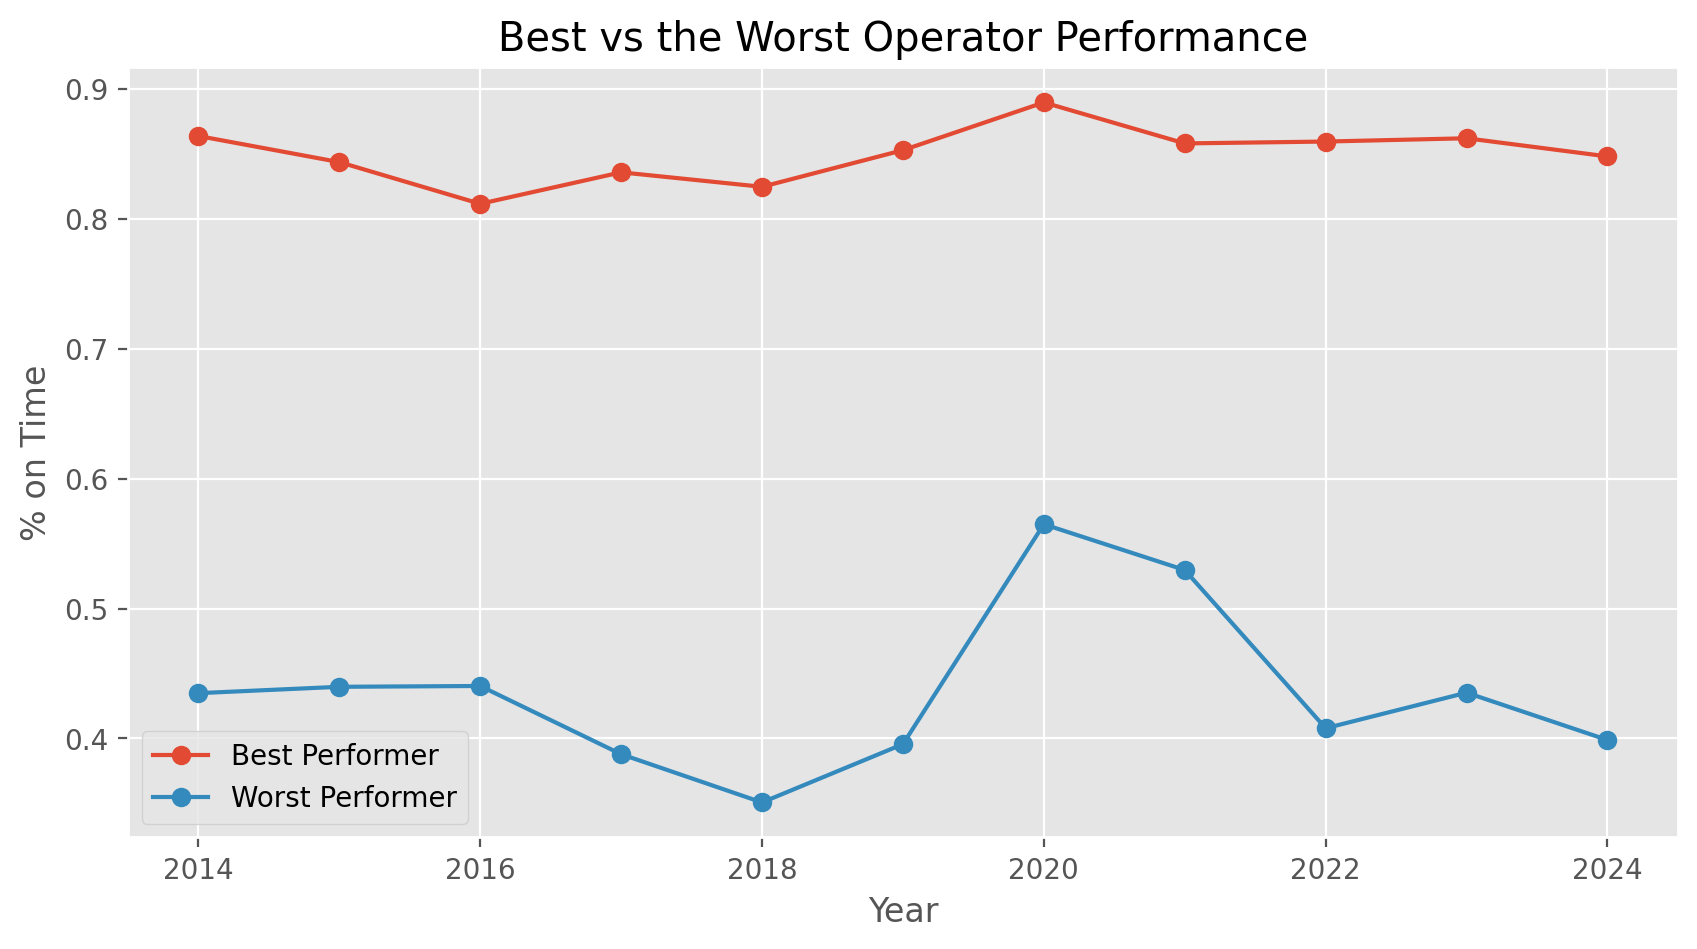

In [459]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

# plt.hist(plot_data, bins = plot_data, edgecolor = 'black', linewidth = 1.2)

# Plot the best performer line
plt.plot(
    best_per_year["Start_Year"],
    best_per_year["pct_ontime"],
    marker="o",
    label="Best Performer"
)

# Plot the worst performer line
plt.plot(
    worst_per_year["Start_Year"],
    worst_per_year["pct_ontime"],
    marker="o",
    label="Worst Performer"
)



plt.xlabel("Year")
plt.ylabel("% on Time")
plt.title("Best vs the Worst Operator Performance")
plt.legend()

plt.show();

Let's now start looking at seasonal data

In [460]:

df_trains_season_operator = (
 df_trains_clean.groupby(["Season", "Operator"], as_index=False)
 .agg(total_stops=("Number of recorded station stops", "sum"),
     total_ontime=("ontime_count", "sum")
)
)

# Now create the new "% on time"
df_trains_season_operator["pct_ontime"] = (
    df_trains_season_operator["total_ontime"] / df_trains_season_operator["total_stops"] * 100
)



In [461]:
# Now let's clean up to just the columns we need.
df_trains_season_operator = df_trains_season_operator[["Season", "Operator","total_stops", "pct_ontime"]]

# Need to recalculate our ontime count again as we've removed the Operator group-by
df_trains_season_operator["ontime_count"] = df_trains_season_operator["pct_ontime"] / 100 * df_trains_season_operator["total_stops"]

In [462]:
df_trains_season_operator[df_trains_season_operator["Operator"] == "c2c"]

,Season,Operator,total_stops,pct_ontime,ontime_count
23,Spring,c2c,3784239,84.454251,3.195951e+06
47,Summer,c2c,3937769,82.279799,3.239988e+06
71,Autumn,c2c,3859848,79.335615,3.062234e+06
95,Winter,c2c,5032314,83.275086,4.190664e+06


In [463]:

# Mean on-time by season (overall)

df_trains_season = (
 df_trains_clean.groupby(["Season"], as_index=False)
 .agg(total_stops=("Number of recorded station stops", "sum"),
     total_ontime=("ontime_count", "sum")
)
)

# Now create the new "% on time"
df_trains_season["pct_ontime"] = (
    df_trains_season["total_ontime"] / df_trains_season["total_stops"] * 100
)

df_trains_season
                     


,Season,total_stops,total_ontime,pct_ontime
0,Spring,184418428,1.306119e+08,70.823678
1,Summer,187078600,1.272701e+08,68.030284
2,Autumn,189561191,1.164472e+08,61.429872
3,Winter,243363074,1.637015e+08,67.266383


In [466]:

df_season_summary = df_trains_season.groupby("Season")["pct_ontime"].agg(['mean'])  

print("The Season Analysis")
print(df_season_summary.sort_values("mean"))

# Worst season for each operator
# idxmin is a function I searched for, it returns the index of the row with the minimum value for in 
# this case a given Operator

worst_operator_per_season = (
    df_trains_season_operator
    .loc[
        df_trains_season_operator
        .groupby("Season")["pct_ontime"]
        .idxmin()
    ,
        ["Season", "Operator", "pct_ontime"]
    ]
    .sort_values("Season")
)

print("Worst Operators in a Season")
print(worst_operator_per_season)

# Count frequency of each worst season
# need to figure out why these are all coming out as 1
common_worst = worst_operator_per_season["Season"].value_counts()
print(common_worst)



The Season Analysis
             mean
Season           
Autumn  61.429872
Winter  67.266383
Summer  68.030284
Spring  70.823678
Worst Operators in a Season
    Season              Operator  pct_ontime
0   Spring     Avanti West Coast   51.121480
24  Summer     Avanti West Coast   48.640170
69  Autumn  TransPennine Express   41.928158
72  Winter     Avanti West Coast   47.276264
Season
Spring    1
Summer    1
Autumn    1
Winter    1
Name: count, dtype: int64


So from the above, Autumn is clearly the least reliable season. In our definition that is approx. October, November & December

In [470]:
df_trains_season_operator[df_trains_season_operator["Operator"] == "Avanti West Coast"]

,Season,Operator,total_stops,pct_ontime,ontime_count
0,Spring,Avanti West Coast,1591505,51.121480,8.136009e+05
24,Summer,Avanti West Coast,1644067,48.640170,7.996770e+05
48,Autumn,Avanti West Coast,1655396,42.606093,7.052996e+05
72,Winter,Avanti West Coast,2116731,47.276264,1.000711e+06
